<a href="https://colab.research.google.com/github/mobndash/Exploratory-Data-Analysis-EDA-Techniques/blob/main/EDA_Handling_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# # Example data with outliers
# df = pd.DataFrame({
#     "salary": [50, 55, 60, 65, 70, 75, 1000]   # 1000 is an outlier
# })

In [ ]:
df = pd.read_csv("/content/placement.csv")

In [ ]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


Text(0.5, 1.0, 'Original marks (with Outlier)')

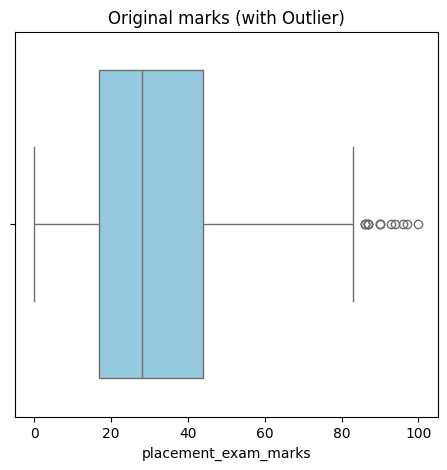

In [ ]:
plt.figure(figsize=(12,5))

# Original distribution
plt.subplot(1,2,1)
sns.boxplot(x=df["placement_exam_marks"], color="skyblue")
plt.title("Original marks (with Outlier)")



# **> Trimming using IQR**
Used when distribution is skewed



In [ ]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [ ]:
# Detect outliers using IQR
Q1 = df["placement_exam_marks"].quantile(0.25)
Q3 = df["placement_exam_marks"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Trimming: remove outliers
df_trimmed = df[(df["placement_exam_marks"] >= lower_bound) & (df["placement_exam_marks"] <= upper_bound)]

print(Q1, "----",  Q3)
print("Original Data:\n", df)
print("\nAfter Trimming:\n", df_trimmed)

17.0 ---- 44.0
Original Data:
      cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
998  8.62                  46.0       1
999  4.90                  10.0       1

[1000 rows x 3 columns]

After Trimming:
      cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
998  8.62                  46.0       1
999  4



# **> Capping (Winsorization) using IQR**



In [ ]:
# Create capped version
df_capped = df.copy()
df_capped["placement_exam_marks"] = np.where(
    df_capped["placement_exam_marks"] > upper_bound, upper_bound,
    np.where(df_capped["placement_exam_marks"] < lower_bound, lower_bound, df_capped["placement_exam_marks"])
)

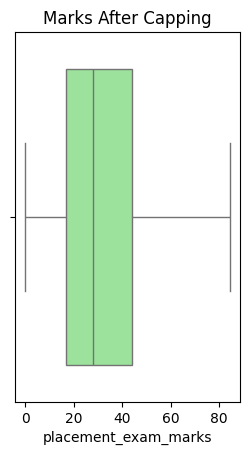

In [ ]:
# After capping
plt.subplot(1,2,2)
sns.boxplot(x=df_capped["placement_exam_marks"], color="lightgreen")
plt.title("Marks After Capping")

plt.show()

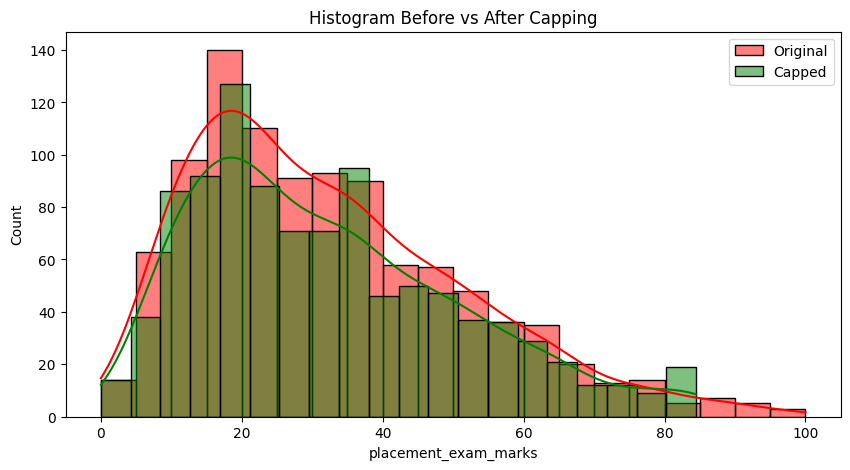

In [ ]:
# Histogram for better view
plt.figure(figsize=(10,5))
sns.histplot(df["placement_exam_marks"], bins=20, kde=True, color="red", alpha=0.5, label="Original")
sns.histplot(df_capped["placement_exam_marks"], bins=20, kde=True, color="green", alpha=0.5, label="Capped")
plt.legend()
plt.title("Histogram Before vs After Capping")
plt.show()



# **> Using Z-Score**
Used when data is normally distributed



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Example data with outliers
df = pd.DataFrame({
    "salary": [50, 55, 60, 65, 70, 75, 1000]   # 1000 is an outlier
})

# Compute z-scores
from scipy.stats import zscore
import numpy as np

df["zscore"] = zscore(df["salary"])

# Use threshold = 2
outliers = df[np.abs(df["zscore"]) > 2]

print(outliers)


   salary    zscore
6    1000  2.448779


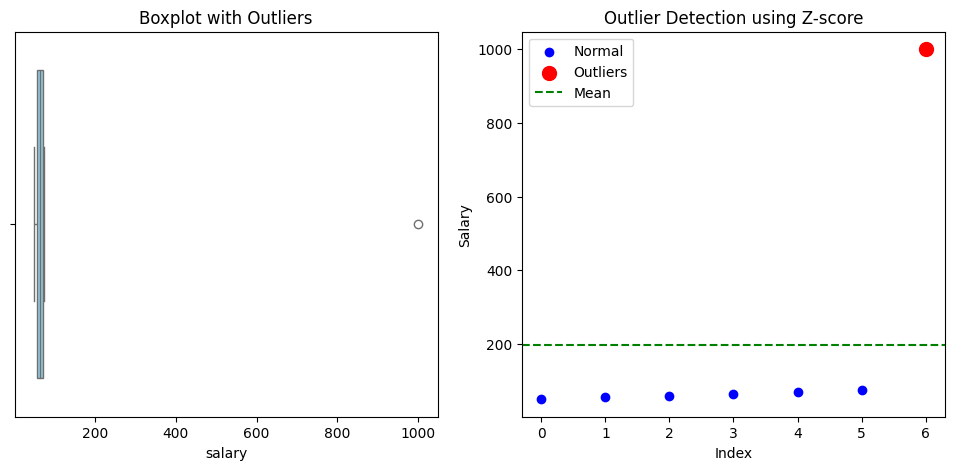

In [ ]:
plt.figure(figsize=(12,5))

# Boxplot
plt.subplot(1,2,1)
sns.boxplot(x=df["salary"], color="skyblue")
plt.title("Boxplot with Outliers")

# Scatterplot with Z-score highlighting
plt.subplot(1,2,2)
plt.scatter(df.index, df["salary"], color="blue", label="Normal")
plt.scatter(outliers.index, outliers["salary"], color="red", label="Outliers", s=100)
plt.axhline(df["salary"].mean(), color="green", linestyle="--", label="Mean")
plt.title("Outlier Detection using Z-score")
plt.xlabel("Index")
plt.ylabel("Salary")
plt.legend()

plt.show()